In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# reading the data set
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the shape of the data set
day.shape

(730, 16)

In [4]:
# printing the columns name
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# we can drope instant column since it is a index column
day.drop(['instant'],axis=1,inplace=True)

In [6]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#summary statistics of data set
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking null value
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#we can drop the following columns since that are not relevent . Eg: atemp and temp are almost same value,cnt is the sum of casual and registered 
day.drop(['dteday','atemp','casual','registered'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [11]:
#operations on categorical data, replacing the values
day['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
day['weathersit'].replace({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'},inplace=True)
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,43.6957,12.522300,1600
5,spring,0,1,0,4,1,clear,8.378268,51.8261,6.000868,1606
6,spring,0,1,0,5,1,mist,8.057402,49.8696,11.304642,1510
7,spring,0,1,0,6,0,mist,6.765000,53.5833,17.875868,959
8,spring,0,1,0,0,0,clear,5.671653,43.4167,24.250650,822
9,spring,0,1,0,1,1,clear,6.184153,48.2917,14.958889,1321


In [13]:
day['weekday'].replace({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'},inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [14]:
# numerical columns to appropriate types

day[['temp','hum','windspeed','cnt']]=day[['temp','hum','windspeed','cnt']].apply(pd.to_numeric)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [15]:
# Convert variables to object type
# day['mnth']=day['mnth'].astype(object)
# day['season']=day['season'].astype(object)
# day['weathersit']=day['weathersit'].astype(object)
# day['weekday']=day['weekday'].astype(object)
# day.info()

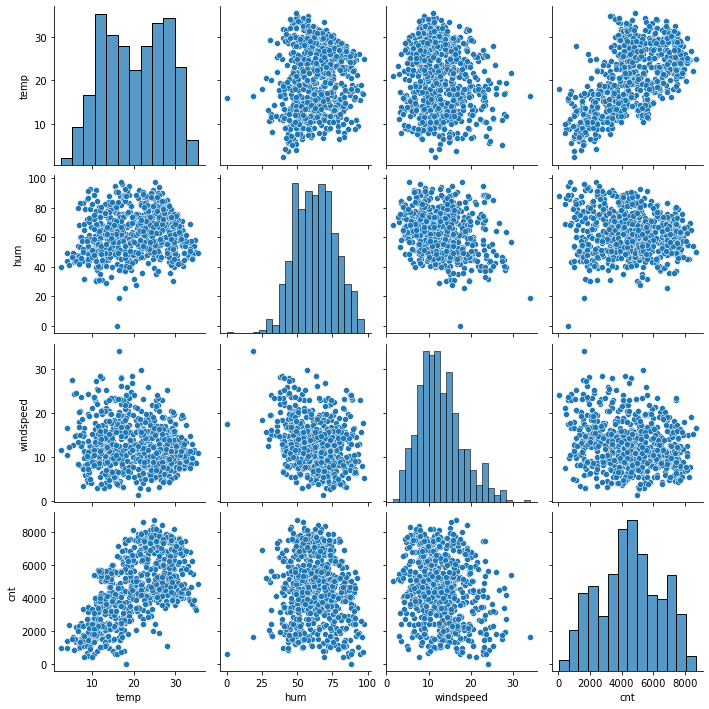

In [16]:
#EDA on data set. visualise the numerical variables
sns.pairplot(day,vars=['temp','hum','windspeed','cnt'])
plt.show()

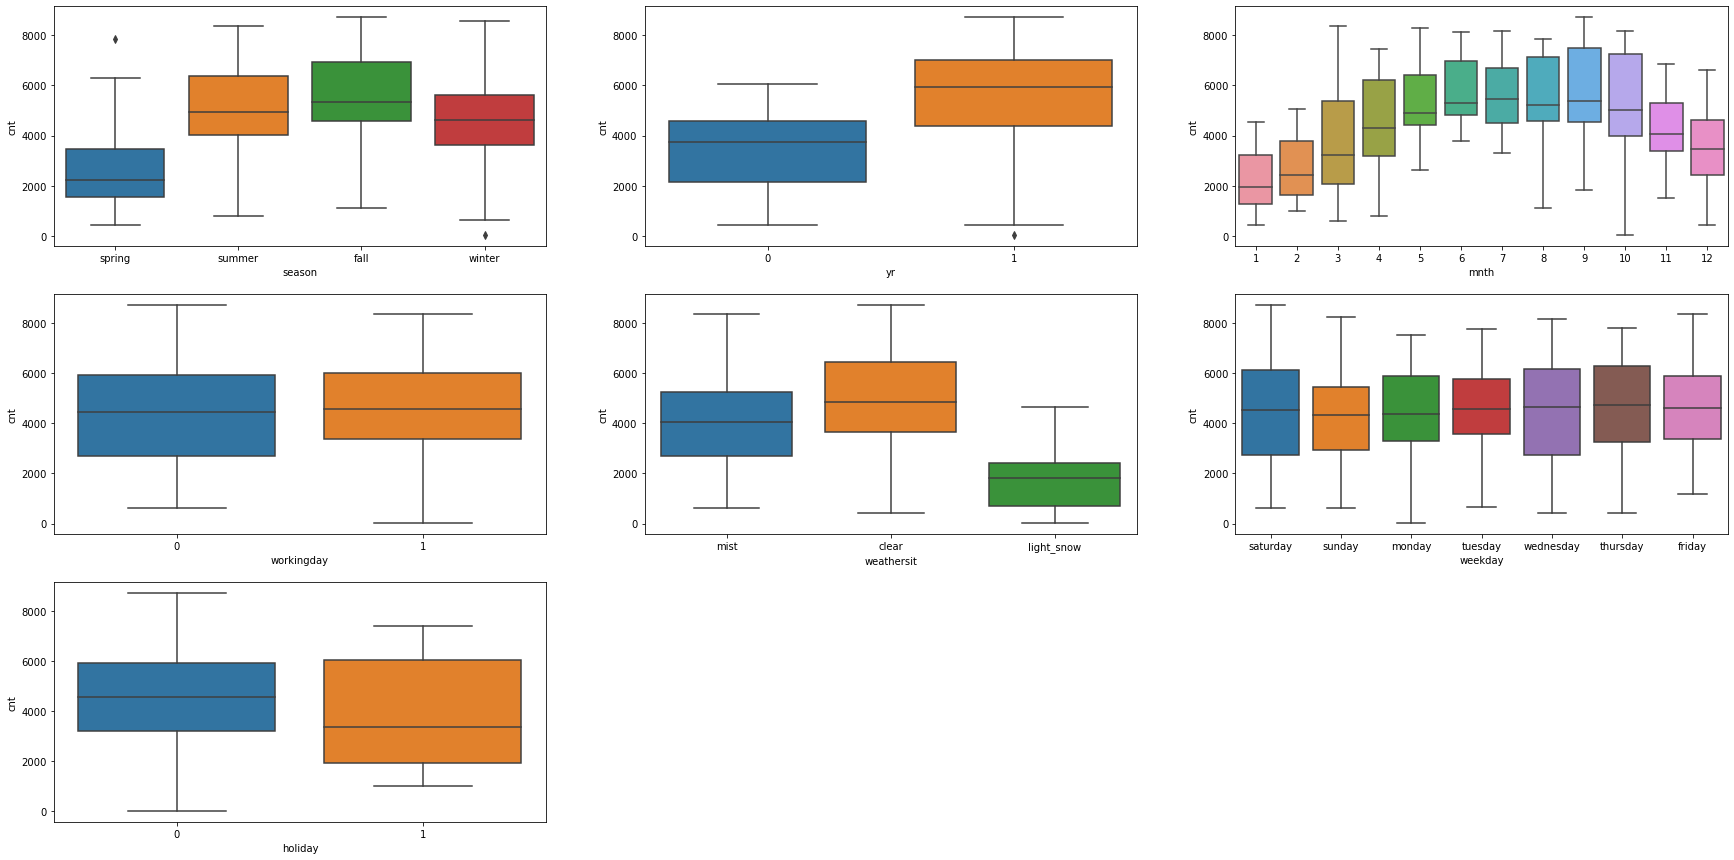

In [17]:
#box plots for categorical variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.show()

- Good positive trend in summer and fall
- year 1 (2019),weekwnd and clear is also having a good positive trend
 

In [18]:
# #Convert variables to object type
day['mnth']=day['mnth'].astype(object)
day['season']=day['season'].astype(object)
day['weathersit']=day['weathersit'].astype(object)
day['weekday']=day['weekday'].astype(object)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Preparing data modelling

In [19]:
# ceating dummy variable for catagorical data
Season=pd.get_dummies(day['season'],drop_first=True)
Season.describe()


,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [20]:

#concatination of Season with data set
day=pd.concat([day,Season], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,saturday,0,mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,sunday,0,mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,monday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [21]:
Weather=pd.get_dummies(day['weathersit'],drop_first=True)
day=pd.concat([day,Weather], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,light_snow,mist
0,spring,0,1,0,saturday,0,mist,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,sunday,0,mist,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,0,monday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [22]:
Day_of_week=pd.get_dummies(day['weekday'],drop_first=True)
day=pd.concat([day,Day_of_week], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,light_snow,mist,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,0,1,0,saturday,0,mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,1,0,sunday,0,mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,1,0,monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [23]:
Month=pd.get_dummies(day['mnth'],drop_first=True)
day=pd.concat([day,Month], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,saturday,0,mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,sunday,0,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# droping the converted categorical columns
day.drop(['season'],axis=1,inplace=True)
day.drop(['weathersit'],axis=1,inplace=True)

day.drop(['weekday'],axis=1,inplace=True)

day.drop(['mnth'],axis=1,inplace=True)


# day.head()


In [25]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# splitting the data into test and train
df_train,df_test=train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [27]:
day.columns

Index([        'yr',    'holiday', 'workingday',       'temp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
       'light_snow',       'mist',     'monday',   'saturday',     'sunday',
         'thursday',    'tuesday',  'wednesday',            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12],
      dtype='object')

In [28]:
# Scaling the numerical data
scaler=MinMaxScaler()
num_var=['temp','hum','windspeed','cnt']
#fit on data
df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_train.head()

<ipython-input-28-9ca28338aae2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_var]=scaler.fit_transform(df_train[num_var])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Trainig the model


In [29]:
y_train=df_train.pop('cnt')##exract cnt column and put it in yaxis
X_train=df_train

In [30]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)#create first model
lr_model=lr.fit()#fitting
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        09:03:53   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.034      5.739      0.000       0.127       0.258
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0026      0.024     -0.111      0.912      -0.049       0.044
workingday     0.0835      0.012      6.926      0.000       0.060       0.107
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
light_snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
monday        -0.0209      0.015     -1.365      0.173      -0.051       0.009
saturday       0.0829      0.014      6.135      0.000       0.056       0.109
sunday         0.0287      0.014      2.059      0.040       0.001       0.056
thursday      -0.0091      0.016     -0.588      0.557      -0.040       0.021
tuesday       -0.0179      0.016     -1.156      0.248      -0.048       0.013
wednesday     -0.0055      0.015     -0.368      0.713      -0.035       0.024
2              0.0309      0.021      1.497      0.135      -0.010       0.071
3              0.0646      0.022      2.888      0.004       0.021       0.109
4              0.0633      0.034      1.885      0.060      -0.003       0.129
5              0.0880      0.036      2.433      0.015       0.017       0.159
6              0.0679      0.039      1.752      0.080      -0.008       0.144
7              0.0295      0.044      0.672      0.502      -0.057       0.116
8              0.0837      0.042      2.009      0.045       0.002       0.166
9              0.1493      0.037      3.997      0.000       0.076       0.223
10             0.0709      0.034      2.055      0.040       0.003       0.139
11             0.0234      0.033      0.714      0.476      -0.041       0.088
12             0.0190      0.026      0.718      0.473      -0.033       0.071
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [31]:
#based on significance (p-val) we can drop variable
# check VIF and drop variable

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,77.72
12,saturday,17.88
13,sunday,16.90
6,spring,10.75
23,8,9.80
8,winter,9.44
22,7,8.82
7,summer,8.27
3,temp,7.08
21,6,6.90


In [32]:
##removing holiday var since high p value
x=X_train.drop('holiday',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        09:03:55   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1898      0.050      3.818      0.000       0.092       0.288
yr             0.2324      0.008     28.819      0.000       0.217       0.248
workingday     0.0861      0.027      3.234      0.001       0.034       0.138
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
light_snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
monday        -0.0209      0.015     -1.365      0.173      -0.051       0.009
saturday       0.0855      0.030      2.835      0.005       0.026       0.145
sunday         0.0313      0.030      1.035      0.301      -0.028       0.091
thursday      -0.0091      0.016     -0.588      0.557      -0.040       0.021
tuesday       -0.0179      0.016     -1.156      0.248      -0.048       0.013
wednesday     -0.0055      0.015     -0.368      0.713      -0.035       0.024
2              0.0309      0.021      1.497      0.135      -0.010       0.071
3              0.0646      0.022      2.888      0.004       0.021       0.109
4              0.0633      0.034      1.885      0.060      -0.003       0.129
5              0.0880      0.036      2.433      0.015       0.017       0.159
6              0.0679      0.039      1.752      0.080      -0.008       0.144
7              0.0295      0.044      0.672      0.502      -0.057       0.116
8              0.0837      0.042      2.009      0.045       0.002       0.166
9              0.1493      0.037      3.997      0.000       0.076       0.223
10             0.0709      0.034      2.055      0.040       0.003       0.139
11             0.0234      0.033      0.714      0.476      -0.041       0.088
12             0.0190      0.026      0.718      0.473      -0.033       0.071
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,45.70
3,hum,36.64
1,workingday,22.31
7,winter,11.14
6,summer,9.39
22,8,9.32
5,spring,8.94
21,7,8.33
20,6,6.98
19,5,6.96


In [34]:
#removing wednesday var
x=x.drop('wednesday',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.06e-182
Time:                        09:03:57   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     483   BIC:                            -885.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1876      0.049      3.805      0.000       0.091       0.285
yr             0.2324      0.008     28.842      0.000       0.217       0.248
workingday     0.0858      0.027      3.227      0.001       0.034       0.138
temp           0.4452      0.046      9.633      0.000       0.354       0.536
hum           -0.1521      0.038     -3.952      0.000      -0.228      -0.076
windspeed     -0.1860      0.026     -7.233      0.000      -0.237      -0.135
spring        -0.0450      0.030     -1.505      0.133      -0.104       0.014
summer         0.0428      0.026      1.638      0.102      -0.009       0.094
winter         0.1075      0.028      3.853      0.000       0.053       0.162
light_snow    -0.2565      0.026     -9.755      0.000      -0.308      -0.205
mist          -0.0593      0.010     -5.702      0.000      -0.080      -0.039
monday        -0.0179      0.013     -1.383      0.167      -0.043       0.008
saturday       0.0882      0.029      3.021      0.003       0.031       0.146
sunday         0.0340      0.029      1.162      0.246      -0.024       0.092
thursday      -0.0061      0.013     -0.462      0.644      -0.032       0.020
tuesday       -0.0149      0.013     -1.135      0.257      -0.041       0.011
2              0.0310      0.021      1.503      0.134      -0.010       0.071
3              0.0646      0.022      2.892      0.004       0.021       0.109
4              0.0634      0.034      1.890      0.059      -0.003       0.129
5              0.0880      0.036      2.436      0.015       0.017       0.159
6              0.0678      0.039      1.751      0.081      -0.008       0.144
7              0.0297      0.044      0.678      0.498      -0.056       0.116
8              0.0837      0.042      2.012      0.045       0.002       0.166
9              0.1491      0.037      3.997      0.000       0.076       0.222
10             0.0710      0.034      2.060      0.040       0.003       0.139
11             0.0232      0.033      0.708      0.479      -0.041       0.088
12             0.0192      0.026      0.724      0.469      -0.033       0.071
==============================================================================
Omnibus:                       83.246   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.501
Skew:                          -0.794   Prob(JB):                     8.86e-51
Kurtosis:                       5.885   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,45.65
3,hum,36.29
1,workingday,22.02
7,winter,11.11
6,summer,9.34
21,8,9.30
5,spring,8.82
20,7,8.32
19,6,6.96
18,5,6.95


In [36]:
#removing thursday var
x=x.drop('thursday',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.19e-183
Time:                        09:03:58   Log-Likelihood:                 526.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1848      0.049      3.780      0.000       0.089       0.281
yr             0.2324      0.008     28.865      0.000       0.217       0.248
workingday     0.0862      0.027      3.247      0.001       0.034       0.138
temp           0.4448      0.046      9.635      0.000       0.354       0.536
hum           -0.1518      0.038     -3.949      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.241      0.000      -0.237      -0.136
spring        -0.0446      0.030     -1.493      0.136      -0.103       0.014
summer         0.0430      0.026      1.647      0.100      -0.008       0.094
winter         0.1080      0.028      3.875      0.000       0.053       0.163
light_snow    -0.2567      0.026     -9.771      0.000      -0.308      -0.205
mist          -0.0591      0.010     -5.692      0.000      -0.079      -0.039
monday        -0.0160      0.012     -1.304      0.193      -0.040       0.008
saturday       0.0906      0.029      3.150      0.002       0.034       0.147
sunday         0.0363      0.029      1.260      0.208      -0.020       0.093
tuesday       -0.0130      0.012     -1.044      0.297      -0.038       0.011
2              0.0313      0.021      1.518      0.130      -0.009       0.072
3              0.0646      0.022      2.893      0.004       0.021       0.108
4              0.0639      0.034      1.907      0.057      -0.002       0.130
5              0.0886      0.036      2.454      0.014       0.018       0.159
6              0.0684      0.039      1.769      0.078      -0.008       0.144
7              0.0304      0.044      0.696      0.487      -0.055       0.116
8              0.0844      0.042      2.030      0.043       0.003       0.166
9              0.1495      0.037      4.011      0.000       0.076       0.223
10             0.0712      0.034      2.069      0.039       0.004       0.139
11             0.0230      0.033      0.700      0.484      -0.041       0.087
12             0.0190      0.026      0.718      0.473      -0.033       0.071
==============================================================================
Omnibus:                       83.749   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.918
Skew:                          -0.798   Prob(JB):                     2.65e-51
Kurtosis:                       5.901   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,45.58
3,hum,36.24
1,workingday,21.98
7,winter,11.11
6,summer,9.33
20,8,9.30
5,spring,8.79
19,7,8.32
18,6,6.96
17,5,6.95


In [38]:
#removing temp var since high VIF
x=x.drop('temp',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     94.70
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.06e-166
Time:                        09:04:00   Log-Likelihood:                 482.10
No. Observations:                 510   AIC:                            -914.2
Df Residuals:                     485   BIC:                            -808.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2736      0.052      5.226      0.000       0.171       0.376
yr             0.2458      0.009     28.425      0.000       0.229       0.263
workingday     0.0686      0.029      2.374      0.018       0.012       0.125
hum           -0.0501      0.040     -1.242      0.215      -0.129       0.029
windspeed     -0.1782      0.028     -6.362      0.000      -0.233      -0.123
spring        -0.0818      0.032     -2.528      0.012      -0.145      -0.018
summer         0.0026      0.028      0.091      0.927      -0.053       0.058
winter         0.0836      0.030      2.761      0.006       0.024       0.143
light_snow    -0.2914      0.028    -10.269      0.000      -0.347      -0.236
mist          -0.0790      0.011     -7.127      0.000      -0.101      -0.057
monday        -0.0225      0.013     -1.691      0.091      -0.049       0.004
saturday       0.0681      0.031      2.179      0.030       0.007       0.130
sunday         0.0118      0.031      0.378      0.706      -0.050       0.073
tuesday       -0.0132      0.014     -0.970      0.333      -0.040       0.014
2              0.0658      0.022      2.975      0.003       0.022       0.109
3              0.1557      0.022      7.058      0.000       0.112       0.199
4              0.1937      0.033      5.790      0.000       0.128       0.259
5              0.2778      0.033      8.412      0.000       0.213       0.343
6              0.3033      0.033      9.265      0.000       0.239       0.368
7              0.2767      0.039      7.152      0.000       0.201       0.353
8              0.3025      0.038      7.957      0.000       0.228       0.377
9              0.3219      0.036      9.028      0.000       0.252       0.392
10             0.1890      0.035      5.385      0.000       0.120       0.258
11             0.0854      0.035      2.437      0.015       0.017       0.154
12             0.0585      0.028      2.054      0.041       0.003       0.115
==============================================================================
Omnibus:                       83.922   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.043
Skew:                          -0.705   Prob(JB):                     2.87e-68
Kurtosis:                       6.557   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,30.83
1,workingday,21.95
6,winter,11.10
5,summer,9.24
4,spring,8.79
10,saturday,6.13
11,sunday,5.81
3,windspeed,5.34
21,10,5.06
19,8,5.04


In [40]:
#removing summer
x=x.drop('summer',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     99.02
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.04e-167
Time:                        09:04:01   Log-Likelihood:                 482.10
No. Observations:                 510   AIC:                            -916.2
Df Residuals:                     486   BIC:                            -814.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2753      0.049      5.661      0.000       0.180       0.371
yr             0.2458      0.009     28.454      0.000       0.229       0.263
workingday     0.0686      0.029      2.375      0.018       0.012       0.125
hum           -0.0499      0.040     -1.240      0.215      -0.129       0.029
windspeed     -0.1781      0.028     -6.373      0.000      -0.233      -0.123
spring        -0.0837      0.025     -3.395      0.001      -0.132      -0.035
winter         0.0825      0.028      2.960      0.003       0.028       0.137
light_snow    -0.2915      0.028    -10.287      0.000      -0.347      -0.236
mist          -0.0790      0.011     -7.134      0.000      -0.101      -0.057
monday        -0.0225      0.013     -1.692      0.091      -0.049       0.004
saturday       0.0681      0.031      2.182      0.030       0.007       0.129
sunday         0.0118      0.031      0.378      0.706      -0.050       0.073
tuesday       -0.0132      0.014     -0.970      0.333      -0.040       0.014
2              0.0658      0.022      2.978      0.003       0.022       0.109
3              0.1559      0.022      7.125      0.000       0.113       0.199
4              0.1944      0.033      5.952      0.000       0.130       0.259
5              0.2784      0.032      8.641      0.000       0.215       0.342
6              0.3030      0.033      9.300      0.000       0.239       0.367
7              0.2748      0.033      8.421      0.000       0.211       0.339
8              0.3006      0.032      9.471      0.000       0.238       0.363
9              0.3202      0.031     10.485      0.000       0.260       0.380
10             0.1882      0.034      5.564      0.000       0.122       0.255
11             0.0845      0.034      2.502      0.013       0.018       0.151
12             0.0579      0.028      2.089      0.037       0.003       0.112
==============================================================================
Omnibus:                       83.902   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.108
Skew:                          -0.705   Prob(JB):                     2.78e-68
Kurtosis:                       6.557   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,28.63
1,workingday,20.67
5,winter,10.07
4,spring,5.90
9,saturday,5.74
10,sunday,5.52
3,windspeed,5.20
20,10,4.93
21,11,4.82
18,8,4.05


In [42]:
#removing humidity
x=x.drop('hum',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.26e-167
Time:                        09:04:03   Log-Likelihood:                 481.29
No. Observations:                 510   AIC:                            -916.6
Df Residuals:                     487   BIC:                            -819.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2436      0.041      5.884      0.000       0.162       0.325
yr             0.2466      0.009     28.617      0.000       0.230       0.264
workingday     0.0686      0.029      2.376      0.018       0.012       0.125
windspeed     -0.1687      0.027     -6.267      0.000      -0.222      -0.116
spring        -0.0826      0.025     -3.352      0.001      -0.131      -0.034
winter         0.0827      0.028      2.965      0.003       0.028       0.137
light_snow    -0.3049      0.026    -11.631      0.000      -0.356      -0.253
mist          -0.0866      0.009     -9.370      0.000      -0.105      -0.068
monday        -0.0233      0.013     -1.750      0.081      -0.049       0.003
saturday       0.0686      0.031      2.195      0.029       0.007       0.130
sunday         0.0107      0.031      0.343      0.732      -0.051       0.072
tuesday       -0.0137      0.014     -1.012      0.312      -0.040       0.013
2              0.0665      0.022      3.009      0.003       0.023       0.110
3              0.1561      0.022      7.129      0.000       0.113       0.199
4              0.1955      0.033      5.985      0.000       0.131       0.260
5              0.2747      0.032      8.558      0.000       0.212       0.338
6              0.3032      0.033      9.299      0.000       0.239       0.367
7              0.2742      0.033      8.399      0.000       0.210       0.338
8              0.2987      0.032      9.416      0.000       0.236       0.361
9              0.3168      0.030     10.410      0.000       0.257       0.377
10             0.1846      0.034      5.475      0.000       0.118       0.251
11             0.0833      0.034      2.465      0.014       0.017       0.150
12             0.0556      0.028      2.008      0.045       0.001       0.110
==============================================================================
Omnibus:                       85.323   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.351
Skew:                          -0.721   Prob(JB):                     9.05e-69
Kurtosis:                       6.559   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,16.79
4,winter,9.90
3,spring,5.26
2,windspeed,5.09
8,saturday,4.84
19,10,4.56
9,sunday,4.52
20,11,4.51
17,8,3.36
14,5,3.09


In [44]:
#removing working day
x=x.drop('workingday',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.94e-167
Time:                        09:04:04   Log-Likelihood:                 478.35
No. Observations:                 510   AIC:                            -912.7
Df Residuals:                     488   BIC:                            -819.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3103      0.031     10.131      0.000       0.250       0.370
yr             0.2471      0.009     28.549      0.000       0.230       0.264
windspeed     -0.1692      0.027     -6.254      0.000      -0.222      -0.116
spring        -0.0833      0.025     -3.363      0.001      -0.132      -0.035
winter         0.0873      0.028      3.125      0.002       0.032       0.142
light_snow    -0.3019      0.026    -11.477      0.000      -0.354      -0.250
mist          -0.0854      0.009     -9.213      0.000      -0.104      -0.067
monday        -0.0312      0.013     -2.411      0.016      -0.057      -0.006
saturday       0.0008      0.013      0.063      0.950      -0.024       0.026
sunday        -0.0567      0.013     -4.282      0.000      -0.083      -0.031
tuesday       -0.0128      0.014     -0.940      0.348      -0.040       0.014
2              0.0652      0.022      2.941      0.003       0.022       0.109
3              0.1587      0.022      7.220      0.000       0.115       0.202
4              0.1962      0.033      5.978      0.000       0.132       0.261
5              0.2766      0.032      8.578      0.000       0.213       0.340
6              0.3056      0.033      9.335      0.000       0.241       0.370
7              0.2763      0.033      8.427      0.000       0.212       0.341
8              0.3006      0.032      9.437      0.000       0.238       0.363
9              0.3145      0.031     10.290      0.000       0.254       0.375
10             0.1805      0.034      5.334      0.000       0.114       0.247
11             0.0746      0.034      2.212      0.027       0.008       0.141
12             0.0532      0.028      1.916      0.056      -0.001       0.108
==============================================================================
Omnibus:                       95.033   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.373
Skew:                          -0.797   Prob(JB):                     1.24e-79
Kurtosis:                       6.816   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,8.80
1,windspeed,4.97
19,11,4.23
18,10,4.19
2,spring,2.98
20,12,2.76
0,yr,2.04
12,4,1.74
10,2,1.63
11,3,1.58


In [46]:
#removing  saturday
x=x.drop('saturday',axis=1)
X_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.81e-168
Time:                        09:04:06   Log-Likelihood:                 478.35
No. Observations:                 510   AIC:                            -914.7
Df Residuals:                     489   BIC:                            -825.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3104      0.030     10.192      0.000       0.251       0.370
yr             0.2471      0.009     28.584      0.000       0.230       0.264
windspeed     -0.1691      0.027     -6.266      0.000      -0.222      -0.116
spring        -0.0832      0.025     -3.366      0.001      -0.132      -0.035
winter         0.0874      0.028      3.133      0.002       0.033       0.142
light_snow    -0.3020      0.026    -11.490      0.000      -0.354      -0.250
mist          -0.0854      0.009     -9.222      0.000      -0.104      -0.067
monday        -0.0314      0.012     -2.523      0.012      -0.056      -0.007
sunday        -0.0569      0.013     -4.459      0.000      -0.082      -0.032
tuesday       -0.0130      0.013     -0.988      0.324      -0.039       0.013
2              0.0652      0.022      2.943      0.003       0.022       0.109
3              0.1587      0.022      7.228      0.000       0.116       0.202
4              0.1962      0.033      5.984      0.000       0.132       0.261
5              0.2766      0.032      8.587      0.000       0.213       0.340
6              0.3056      0.033      9.345      0.000       0.241       0.370
7              0.2763      0.033      8.438      0.000       0.212       0.341
8              0.3006      0.032      9.447      0.000       0.238       0.363
9              0.3145      0.031     10.301      0.000       0.255       0.375
10             0.1804      0.034      5.339      0.000       0.114       0.247
11             0.0746      0.034      2.213      0.027       0.008       0.141
12             0.0532      0.028      1.917      0.056      -0.001       0.108
==============================================================================
Omnibus:                       94.880   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.359
Skew:                          -0.795   Prob(JB):                     1.25e-79
Kurtosis:                       6.817   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,8.74
1,windspeed,4.94
18,11,4.23
17,10,4.19
2,spring,2.91
19,12,2.75
0,yr,2.04
11,4,1.71
9,2,1.63
10,3,1.57


# Residual analysis


In [48]:
y_train_pred=lr_model.predict(X_train_sm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

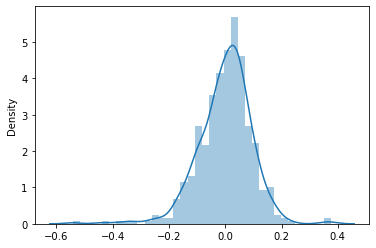

In [49]:
res=y_train-y_train_pred
sns.distplot(res)

# Predition and evaluation

In [50]:

#create a list num var
num_var=['temp','hum','windspeed','cnt']

#2.fit on data
df_test[num_var]=scaler.transform(df_test[num_var])
df_test.head()


<ipython-input-50-1719dd9b6a0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_var]=scaler.transform(df_test[num_var])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test=df_test.pop('cnt')
X_test=df_test

In [53]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
X_test_sm=X_test_sm.drop(['holiday','wednesday'],axis=1)

In [55]:
X_test_sm=X_test_sm.drop(['thursday','temp','summer','hum','workingday','saturday'],axis=1)

In [56]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [57]:
#evaluate
r2_score(y_test,y_test_pred)

0.8051675513565127

In [58]:
#r2 score for train data
r2_score(y_train,y_train_pred)

0.821529443301981

 - We got r2_score of 80.5 % on test data and 82.15% on train data

In [59]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.008970994952741842
0.009315773156563446


- Mean Squared Error value is close to zero for both test and train data , ie model is correctly predicting all variance in the data and able to perform unknown data set also.